# 3. Data Exploration 

In [140]:
import numpy as np
import pandas as pd

In [141]:
df = pd.read_csv('Final_cleaned_data.csv')

In [142]:
df.head()

,Year,Area,avg_temp,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,1990,Ghana,26.73,Cassava,84170,1187.0,65.8
1,1990,Ghana,26.73,Maize,11889,1187.0,65.8
2,1990,Ghana,26.73,Plantains and others,61890,1187.0,65.8
3,1990,Ghana,26.73,"Rice, paddy",16510,1187.0,65.8
4,1990,Ghana,26.73,Sorghum,6310,1187.0,65.8


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   avg_temp                       28242 non-null  float64
 3   Item                           28242 non-null  object 
 4   hg/ha_yield                    28242 non-null  int64  
 5   average_rain_fall_mm_per_year  28242 non-null  float64
 6   pesticides_tonnes              28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [144]:
df.describe()

,Year,avg_temp,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
count,28242.000000,28242.000000,28242.000000,28242.00000,28242.000000
mean,2001.544296,20.542627,77053.332094,1149.05598,37076.909344
std,7.051905,6.312051,84956.612897,709.81215,59958.784665
min,1990.000000,1.300000,50.000000,51.00000,0.040000
25%,1995.000000,16.702500,19919.250000,593.00000,1702.000000
50%,2001.000000,21.510000,38295.000000,1083.00000,17529.440000
75%,2008.000000,26.000000,104676.750000,1668.00000,48687.880000
max,2013.000000,30.650000,501412.000000,3240.00000,367778.000000


In [145]:
#Grouping on the basis of Item  
df.groupby('Item').count()  


,Year,Area,avg_temp,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
Item,,,,,,
Cassava,2045,2045,2045,2045,2045,2045
Maize,4121,4121,4121,4121,4121,4121
Plantains and others,556,556,556,556,556,556
Potatoes,4276,4276,4276,4276,4276,4276
"Rice, paddy",3388,3388,3388,3388,3388,3388
Sorghum,3039,3039,3039,3039,3039,3039
Soybeans,3223,3223,3223,3223,3223,3223
Sweet potatoes,2890,2890,2890,2890,2890,2890
Wheat,3857,3857,3857,3857,3857,3857


In [146]:

df['Area'].nunique()
# The 101 Nations in the dataframe are ranked by highest yield output out of 10

101

In [147]:
df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(10)  
# In the dataset, India has the greatest yield output.

Area
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
Name: hg/ha_yield, dtype: int64

In [148]:
# Items in the group by include:
df.groupby(['Item','Area'], sort=True)['hg/ha_yield'].sum().nlargest(10)


Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Name: hg/ha_yield, dtype: int64

### Now, that we are looking at the links between the columns of the dataframe, displaying the correlation matrix as a heatmap is a handy approach to rapidly verify correlations among columns.

In [149]:
import sklearn  
import seaborn as sns  
import matplotlib.pyplot as plt  
  

The correlation map shows that there is no association between any of the data frame's columns.


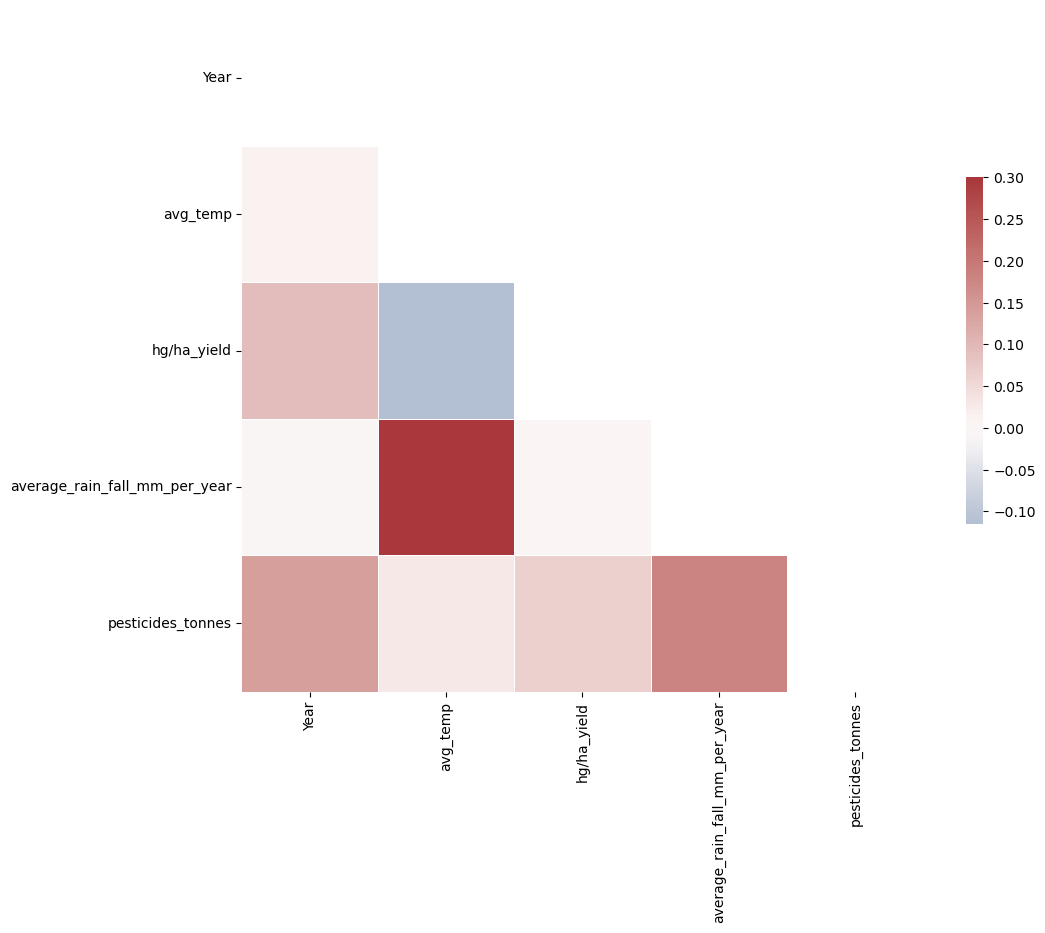

In [150]:
correlation_data= df.select_dtypes(include=[np.number]).corr()  
  
mask = np.zeros_like(correlation_data, dtype=np.bool_)  
mask[np.triu_indices_from(mask)] = True  
  
f, ax = plt.subplots(figsize=(11, 9))  
  
# Make a unique diverging colour map.  
cmap = sns.palette="vlag"  
  
# Create the heatmap with the appropriate aspect ratio and a mask.

sns.heatmap(correlation_data, mask=mask, cmap=cmap, vmax=.3, center=0,  
            square=True, linewidths=.5, cbar_kws={"shrink": .5}); 
print("The correlation map shows that there is no association between any of the data frame's columns.")

# 4. Data Preprocessing - transforming unclean data into clean

In [151]:
df.head() 

,Year,Area,avg_temp,Item,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes
0,1990,Ghana,26.73,Cassava,84170,1187.0,65.8
1,1990,Ghana,26.73,Maize,11889,1187.0,65.8
2,1990,Ghana,26.73,Plantains and others,61890,1187.0,65.8
3,1990,Ghana,26.73,"Rice, paddy",16510,1187.0,65.8
4,1990,Ghana,26.73,Sorghum,6310,1187.0,65.8


# 5. Encoding Categorical Variables

#### One hot encoding method

In [152]:
from sklearn.preprocessing import OneHotEncoder  


In [153]:
#convert into binary
df_onehot = pd.get_dummies(df, columns=['Area',"Item"], prefix = ['Country',"Item"])

features=df_onehot.loc[:, df_onehot.columns != 'hg/ha_yield']  
label=df['hg/ha_yield']  
features.head()  

,Year,avg_temp,average_rain_fall_mm_per_year,pesticides_tonnes,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,1990,26.73,1187.0,65.8,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,1990,26.73,1187.0,65.8,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,1990,26.73,1187.0,65.8,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,1990,26.73,1187.0,65.8,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,1990,26.73,1187.0,65.8,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [154]:
# droping the year
features = features.drop(['Year'], axis=1)


In [155]:
features.head()

,avg_temp,average_rain_fall_mm_per_year,pesticides_tonnes,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,26.73,1187.0,65.8,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,26.73,1187.0,65.8,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,26.73,1187.0,65.8,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,26.73,1187.0,65.8,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,26.73,1187.0,65.8,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


### 6. Scaling Features

The dataset shown above has features with a wide range of magnitudes, units, and ranges. The magnitudes of the features will be far more important in distance computations than the magnitudes of the features

In [156]:
from sklearn.preprocessing import MinMaxScaler  

In [157]:
#  qualize the magnitudes of all characteristics in order to reduce this impact. Scaling can help achieve this.
scaler=MinMaxScaler()  
features=scaler.fit_transform(features) 
features

array([[8.66439523e-01, 3.56224522e-01, 1.78803537e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.66439523e-01, 3.56224522e-01, 1.78803537e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.66439523e-01, 3.56224522e-01, 1.78803537e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [3.50255537e-01, 3.33019755e-01, 4.99260478e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.50255537e-01, 3.33019755e-01, 4.99260478e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.50255537e-01, 3.33019755e-01, 4.99260478e-03, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

## 7. Training and Test Data

In [158]:
from sklearn.model_selection import train_test_split 

In [159]:
 # spliting
train_data, test_data, train_labels, test_labels = train_test_split(features, label, test_size=0.2, random_state=42)

## 8. Comparing and Selecting models

In [160]:
# first - The R2 (coefficient of determination) regression score function.
from sklearn.metrics import r2_score  


In [161]:
def compare_models(model):  
    #This line extracts the name of the model class
    model_name = model.__class__.__name__  
    
    #  trains the model using the (train_data) and (train_labels).
    fit=model.fit(train_data,train_labels)  
    y_pred=fit.predict(test_data)  # makes predictions 
    
    # calculates the R-squared between the actual test labels (test_labels)
    # and the predicted labels (y_pred).
    r2=r2_score(test_labels,y_pred)  
    return([model_name,r2])  
  


In [162]:
from sklearn.ensemble import RandomForestRegressor  
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn import svm  
from sklearn.tree import DecisionTreeRegressor  
  

In [103]:
#  Trained on following regression Algorithms
#  gradient boosting regression model.
#  random forest regression model.
#  support vector regression model.
#  decision tree regression model.

models = [  
    GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0),  
    RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0),  
    svm.SVR(),  
    DecisionTreeRegressor()  
]  

# results of model training are stored in the model_train
model_train=list(map(compare_models,models))  
  
print(*model_train, sep = "\n")

['GradientBoostingRegressor', 0.9058391677331022]
['RandomForestRegressor', 0.6968541956527197]
['SVR', -0.2052185342295938]
['DecisionTreeRegressor', 0.9816229972944187]


In [163]:
df_onehot = df_onehot.drop(['Year'], axis=1)  
df_onehot.head()   

,avg_temp,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,26.73,84170,1187.0,65.8,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,26.73,11889,1187.0,65.8,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
2,26.73,61890,1187.0,65.8,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,26.73,16510,1187.0,65.8,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,26.73,6310,1187.0,65.8,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [164]:
df_onehot.shape

(28242, 115)

In [165]:
# converting test data to columns from the dataframe and omitting the values for "hg/ha yield," which the machine learning model should be predicting  
dataframe_test=pd.DataFrame(test_data,columns=df_onehot.loc[:, df_onehot.columns != 'hg/ha_yield'].columns)  
  
# utilizing the stack function to pivot the columns of the current dataframe and return a reshaped dataframe  
  
cntry=dataframe_test[[col for col in dataframe_test.columns if 'Country' in col]].stack()[dataframe_test[[col for col in dataframe_test.columns if 'Country' in col]].stack()>0]  
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))  
countries=[i.split("_")[1] for i in cntrylist]  
itm=dataframe_test[[col for col in dataframe_test.columns if 'Item' in col]].stack()[dataframe_test[[col for col in dataframe_test.columns if 'Item' in col]].stack()>0]  
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))  
items=[i.split("_")[1] for i in itmlist]  
  
  
dataframe_test.head()  

,avg_temp,average_rain_fall_mm_per_year,pesticides_tonnes,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.911755,0.218564,0.000079,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.828279,0.138915,0.029588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.942078,0.218564,0.000303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.570698,0.188460,0.020175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.882453,0.138915,0.029588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [166]:
dataframe_test.drop([col for col in dataframe_test.columns if 'Item' in col],axis=1,inplace=True)  
dataframe_test.drop([col for col in dataframe_test.columns if 'Country' in col],axis=1,inplace=True)  
dataframe_test.head() 

,avg_temp,average_rain_fall_mm_per_year,pesticides_tonnes
0,0.911755,0.218564,0.000079
1,0.828279,0.138915,0.029588
2,0.942078,0.218564,0.000303
3,0.570698,0.188460,0.020175
4,0.882453,0.138915,0.029588


In [167]:
dataframe_test['Country']=countries  
dataframe_test['Item']=items  
dataframe_test.head()  

,avg_temp,average_rain_fall_mm_per_year,pesticides_tonnes,Country,Item
0,0.911755,0.218564,0.000079,Burkina Faso,Yams
1,0.828279,0.138915,0.029588,Pakistan,Potatoes
2,0.942078,0.218564,0.000303,Burkina Faso,Potatoes
3,0.570698,0.188460,0.020175,Greece,Maize
4,0.882453,0.138915,0.029588,Pakistan,Soybeans


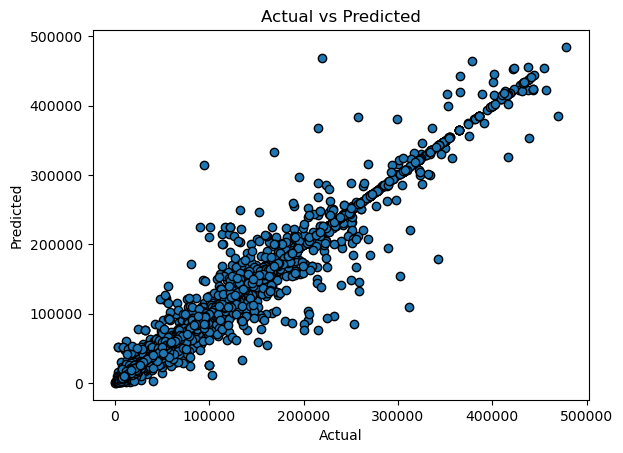

In [168]:
from sklearn.tree import DecisionTreeRegressor  
clf=DecisionTreeRegressor()  
model=clf.fit(train_data,train_labels)  
  
dataframe_test["yield_predicted"]= model.predict(test_data)  
dataframe_test["yield_actual"]=pd.DataFrame(test_labels)["hg/ha_yield"].tolist()  
test_group=dataframe_test.groupby("Item")  
  
# So let's compare the model's actual values to its predictions.  
  
fig, ax = plt.subplots()  
  
ax.scatter(dataframe_test["yield_actual"], dataframe_test["yield_predicted"],edgecolors=(0, 0, 0))  
  
ax.set_xlabel('Actual')  
ax.set_ylabel('Predicted')  
ax.set_title("Actual vs Predicted")  
plt.show() 

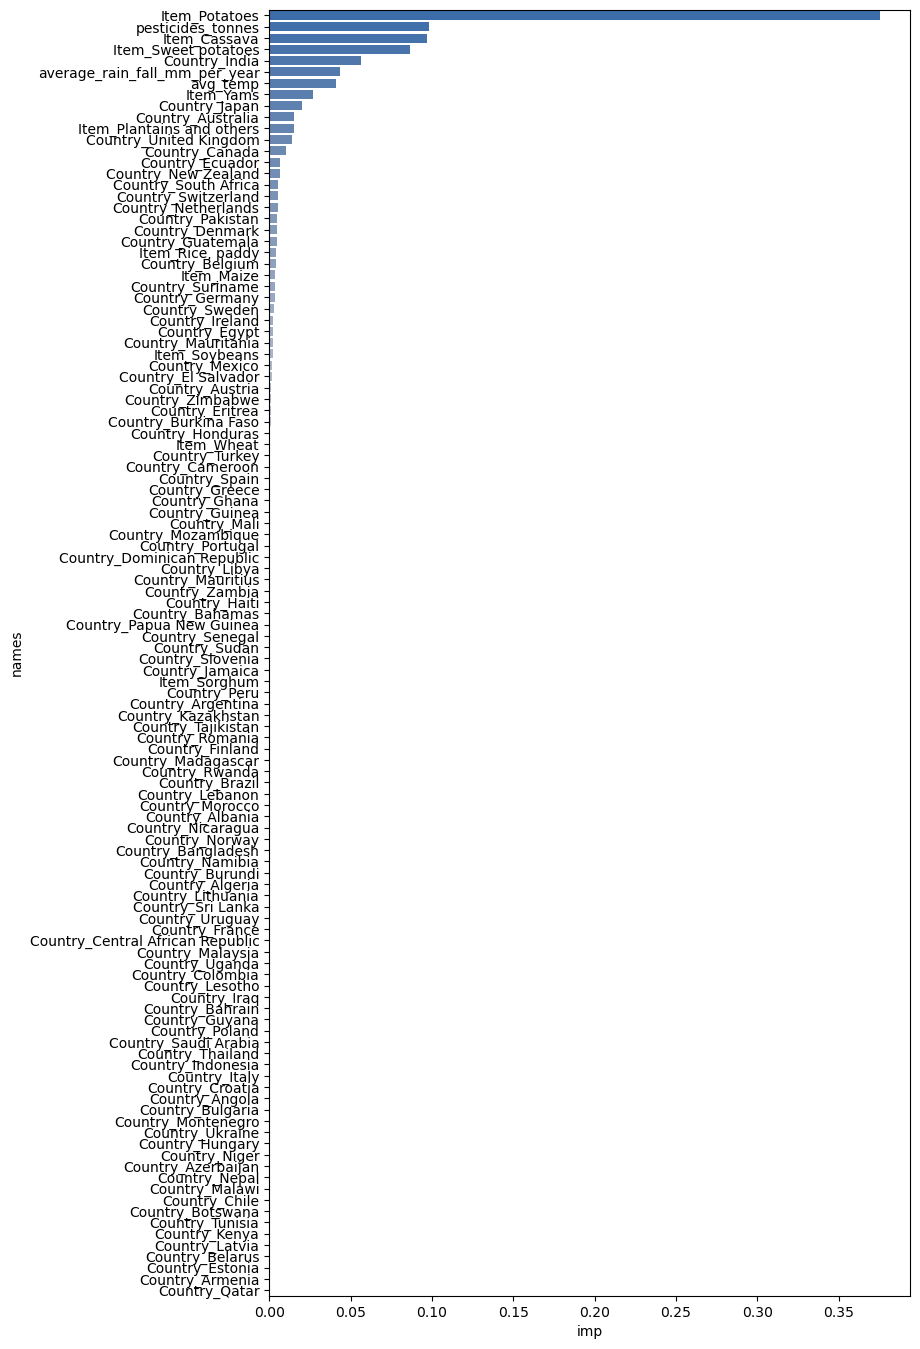

In [169]:
varimp= {'imp':model.feature_importances_,'names':df_onehot.columns[df_onehot.columns!="hg/ha_yield"]}  
  
a4_dims = (8.27,16.7)  
fig, ax = plt.subplots(figsize=a4_dims)  
df=pd.DataFrame.from_dict(varimp)  
df.sort_values(ascending=False,by=["imp"],inplace=True)  
dfdf=df.dropna()  
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax);

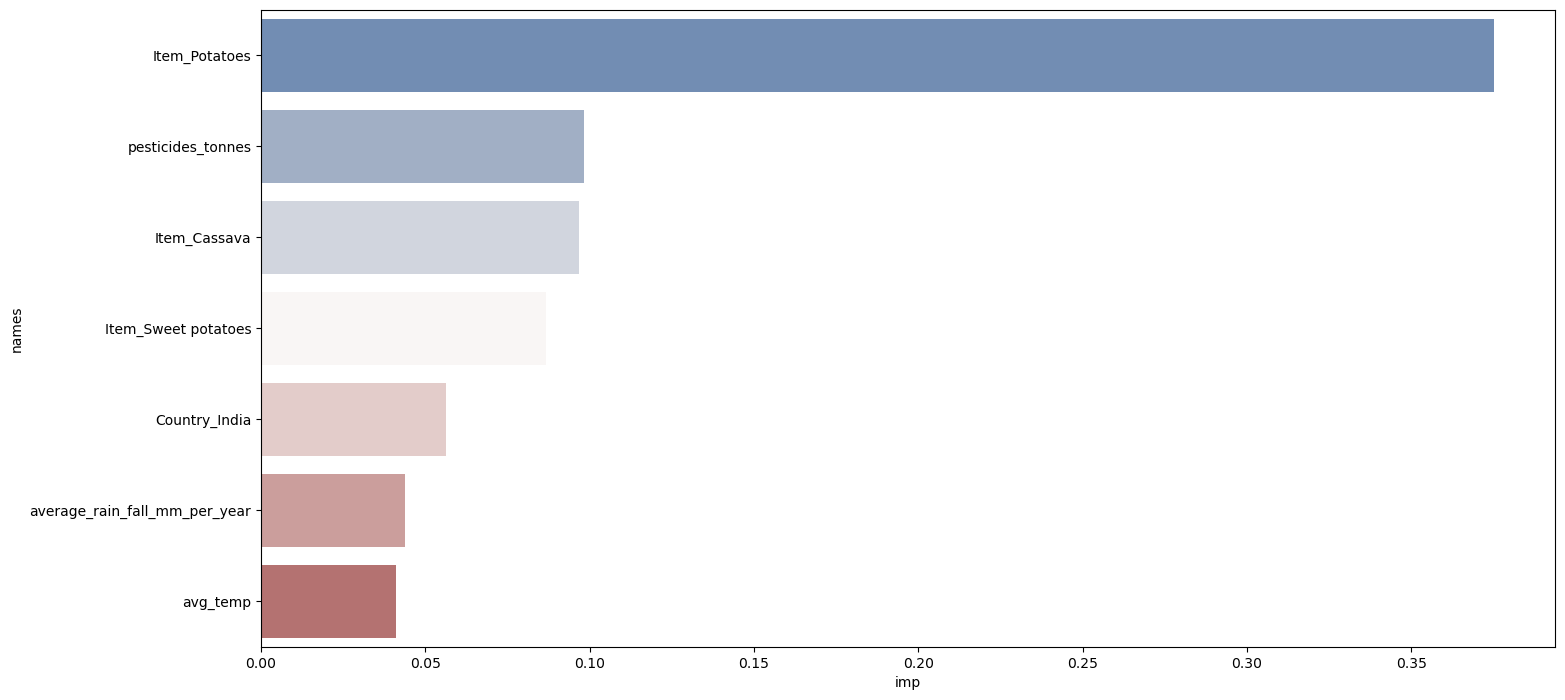

In [170]:
#7 most important factors that affect crops  
a4_dims = (16.7, 8.27)  
  
fig, ax = plt.subplots(figsize=a4_dims)  
df=pd.DataFrame.from_dict(varimp)  
df.sort_values(ascending=False,by=["imp"],inplace=True)  
df=df.dropna()  
df=df.nlargest(7, 'imp')  
sns.barplot(x="imp",y="names",palette="vlag",data=df,orient="h",ax=ax); 

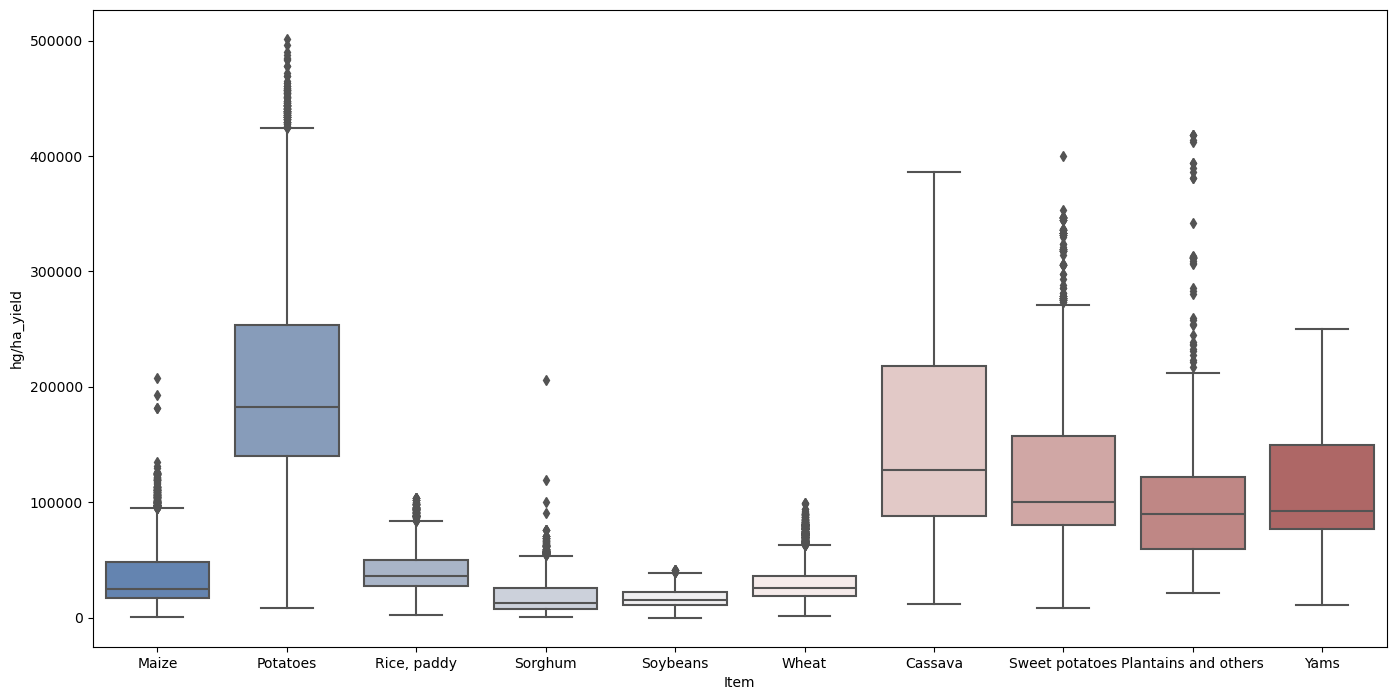

In [174]:
# Boxplot that shows yield for each item 

a4_dims = (16.7, 8.27)  
yield_df = pd.read_csv("yield_df.csv")
fig, ax = plt.subplots(figsize=a4_dims)  
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yield_df,ax=ax);  